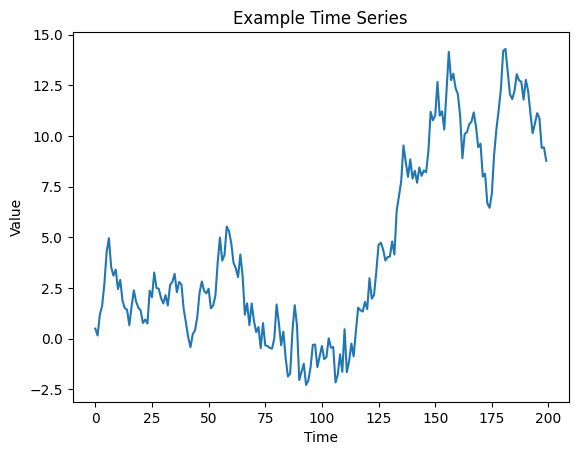

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_time_series(number_of_series, length_of_series):
    data = []
    for _ in range(number_of_series):
        # Create a simple synthetic time series data
        time_series = np.cumsum(np.random.randn(length_of_series))  # Random walk
        data.append(time_series)
    return np.array(data)

# Generate synthetic time series data
time_series_data = generate_time_series(100, 200)

# Example plot of one time series
plt.plot(time_series_data[0])
plt.title("Example Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()


In [4]:
time_series_data = generate_time_series(number_of_series=100, length_of_series=200)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
time_series_scaled = scaler.fit_transform(time_series_data)


In [7]:
def extract_features(data):
    features = []
    for series in data:
        mean = np.mean(series)
        std = np.std(series)
        features.append([mean, std])
    return np.array(features)

extracted_features = extract_features(time_series_data)


In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(extracted_features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


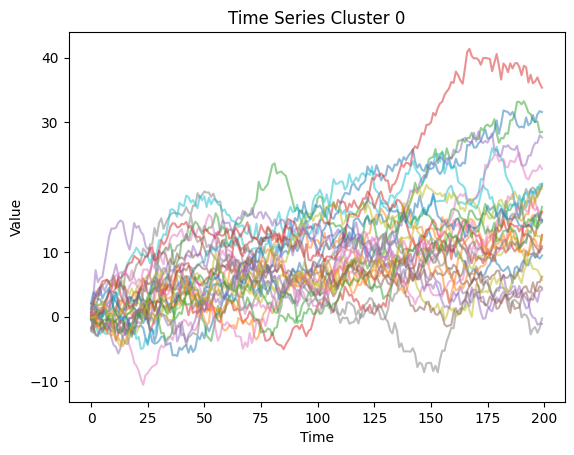

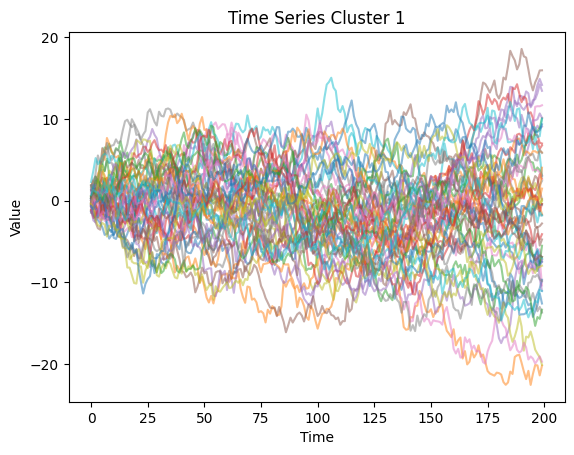

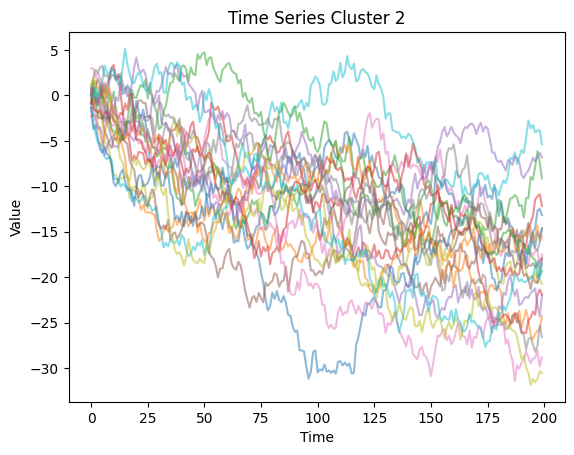

In [9]:
# Visualize the clusters
for i in range(3):  # Assuming 3 clusters
    plt.figure()
    cluster_indices = np.where(clusters == i)[0]
    for index in cluster_indices:
        plt.plot(time_series_data[index], alpha=0.5, label=f'Series {index}')
    plt.title(f'Time Series Cluster {i}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()


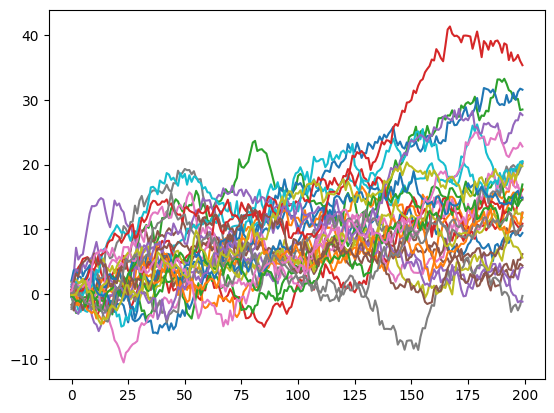

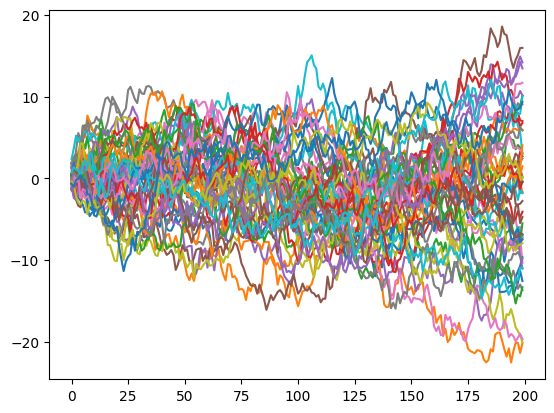

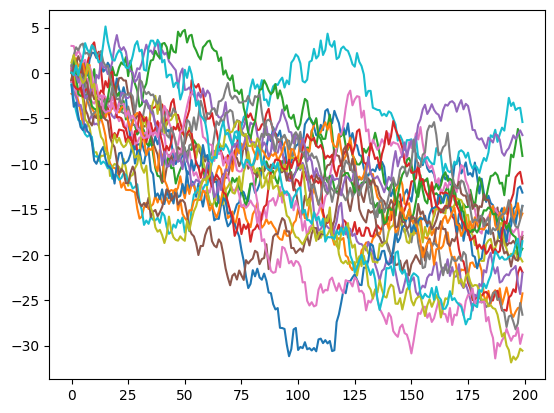

In [11]:
import matplotlib.pyplot as plt

for i in range(3):  # Assuming 3 clusters
    cluster_indices = np.where(clusters == i)
    for index in cluster_indices[0]:
        plt.plot(time_series_data[index], label=f'Cluster {i}')
    plt.show()


In [13]:
pip install pandas scikit-learn yfinance statsmodels

In [23]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Update ticker symbols
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']  # Changed 'FB' to 'META'
data = yf.download(stocks, start="2020-01-01", end="2021-01-01")['Adj Close']

# Check if data is fetched properly
if data.empty:
    raise ValueError("No data fetched. Check your ticker symbols and date range.")

# Calculate daily returns and drop NaN values
daily_returns = data.pct_change().dropna()

# Check if daily_returns DataFrame is empty after dropping NaN values
if daily_returns.empty:
    raise ValueError("Daily returns DataFrame is empty after dropping NaN values.")

[*********************100%%**********************]  5 of 5 completed


In [24]:
# Standardize the data
scaler = StandardScaler()
scaled_returns = scaler.fit_transform(daily_returns)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(scaled_returns)

# Add cluster information to the data
daily_returns['Cluster'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


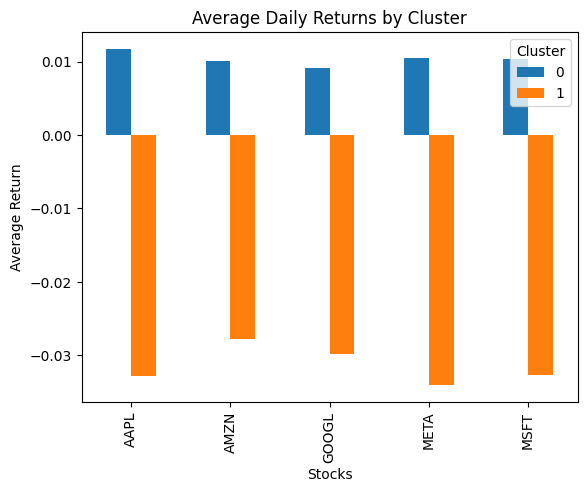

In [32]:
# Calculate mean returns for each cluster
mean_returns = daily_returns.groupby('Cluster').mean()

# Plotting
mean_returns.T.plot(kind='bar')
plt.title('Average Daily Returns by Cluster')
plt.ylabel('Average Return')
plt.xlabel('Stocks')
plt.show()
